Now analysis of parsed data from part 1.

Useful ref http://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

http://stackoverflow.com/questions/21828398/what-is-the-difference-between-pandas-agg-and-apply-function

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

## Helper functions

In [2]:
def query_data(Col, structure, metric):   # helper function to get data, Col = AAA, AXB or diff
    temp = d[Col][(d['structure'] == structure) & (d['metric'] == metric)]
    return temp

In [3]:
def diff_percent(a,ref):
    return 100*((a-ref)/ref)

print(diff_percent(25.0,100.0))

-75.0


## Import data 

In [4]:
d = pd.read_csv('AAA_Dm_data.csv')

Drop entries with no values, and calculate percent difference

In [5]:
d = d[d.AAA != 0]    # drop zero rows
d = d[d.Dm != 0]    # drop zero rows

In [6]:
d['diff'] = diff_percent(d.Dm, d.AAA)  # create % difference col

In [7]:
d.head()

,Case,structure,metric,AAA,Dm,diff
0,Case1,PTV CHEST,D2%,70.006151,69.599396,-0.581028
1,Case1,PTV CHEST,D5%,69.602983,69.044564,-0.802292
2,Case1,PTV CHEST,D50%,65.560826,65.457641,-0.157389
3,Case1,PTV CHEST,D95%,57.272270,56.747946,-0.915495
4,Case1,PTV CHEST,D99%,55.580473,54.672556,-1.633518


### How do the metrics compare for PTV? Extract difference (%) by metric for PTV

In [8]:
d_PTV =  d[d['structure']  == 'PTV CHEST'].groupby(['metric'])
d_PTV = d_PTV.diff  # get diff values
d_PTV.mean().sort_values(ascending=False) #d_PTV.groups.keys()

metric
DHI        9.024376
DSD        8.042449
DMAX       1.549591
D0.1CC     1.075630
D2%        1.009428
D5%        0.899626
D1CC       0.837025
D50%       0.350911
V30GY      0.000000
V20GY      0.000000
V12.5GY    0.000000
V40GY      0.000000
DRX        0.000000
V5GY       0.000000
V50GY     -0.100386
D95%      -1.053558
D99%      -1.594362
V55GY     -3.061308
Name: diff, dtype: float64

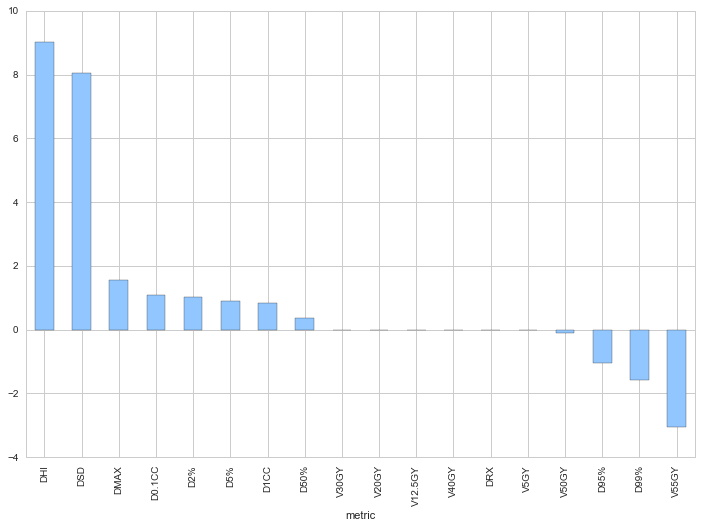

In [9]:
d_PTV.mean().sort_values(ascending=False).plot(kind='bar', figsize=(12,8))

Histograms of data PTV data

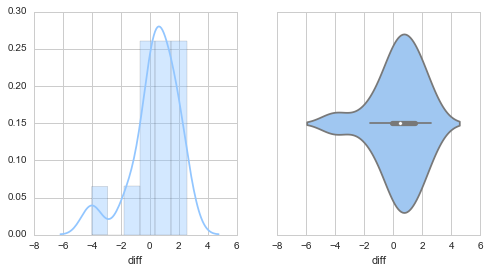

In [10]:
#ax2 = sns.distplot(query_data('diff', 'PTV CHEST', 'D50%'))   # quick test

fig = plt.figure(figsize=(8, 4))
data=query_data('diff', 'PTV CHEST', 'D50%')

plt.subplot(1, 2, 1)
ax2 = sns.distplot(data)

plt.subplot(1, 2, 2)
ax = sns.violinplot(data)  

In [14]:
stats = {'SEM':'sem', 'Variance':'var', 'Mean' : 'mean'}  # 'Counts':'count', 

aggregations = {'diff': stats, 'AAA': stats, 'Dm': stats}

res_table = d[d['metric']  == 'D50%'].groupby(['structure']).agg(aggregations)
res_table

Dm                              AAA            \
                      SEM    Variance       Mean       SEM  Variance   
structure                                                              
Both Lungs       0.085220    0.036312   0.547881  0.077298  0.029875   
Foramen          0.465511    2.817111   1.451497  0.482770  3.029865   
Heart            0.331265    1.536309   1.006369  0.337971  1.599139   
L Brachial plex  3.130743  137.221753   4.852574  0.111438  0.173857   
Lt_Lung          0.321960    1.451211   1.135430  0.319994  1.433543   
Oesophagus       0.719486    7.247245   1.268311  0.744096  7.751505   
PTV CHEST        0.787313    8.678068  64.063104  0.609532  5.201402   
Rt_Lung          0.280679    1.102932   0.925061  0.283879  1.128225   

                                   diff                             
                      Mean          SEM      Variance         Mean  
structure                                                           
Both Lungs        0.556355     3.163431  5.003649e+01    -2.359131  
Foramen           1.532283     1.980592  5.099570e+01    -5.058686  
Heart             1.010267     3.016717  1.274081e+02     8.372282  
L Brachial plex   0.324801  4735.339822  3.139282e+08  6988.283560  
Lt_Lung           1.166398     1.544222  3.338471e+01    -5.437559  
Oesophagus        1.297815     2.559909  9.174388e+01     1.256873  
PTV CHEST        63.821273     0.445626  2.780158e+00     0.350911  
Rt_Lung           0.957381     1.689202  3.994763e+01    -5.027630

## Get wilcoxon p value and place in array

In [11]:
def my_wilcox(data):                    # helper function to return p-value, pass difference data as series from dataframe
    z_stat, p_val = stats.wilcoxon(data)   # if only 1 value passed
    return p_val

In [15]:
A =  d[(d['structure'] == 'PTV CHEST') & (d['metric'] == 'D50%')]
D =  A['diff'].as_matrix()
D

array([-0.15738944,  0.24840765,  0.48911227,  1.63664335,  1.85747404,
        0.42937281,  0.91495724,  1.8135199 ,  0.29943795,  1.09040025,
        2.58882738, -4.00311394, -1.62820827, -0.66668317])

In [16]:
my_wilcox(D)

0.15781136896845493

In [32]:
metrics = d.metric.unique()
metrics

array(['D2%', 'D5%', 'D50%', 'D95%', 'D99%', 'D1CC', 'D0.1CC', 'DMAX',
       'DSD', 'DRX', 'DHI', 'V5GY', 'V12.5GY', 'V20GY', 'V30GY', 'V40GY',
       'V50GY', 'V55GY'], dtype=object)

In [89]:
structures = d.structure.unique()
structures

array(['PTV CHEST', 'Heart', 'Oesophagus', 'Rt_Lung', 'Lt_Lung',
       'Both Lungs', 'L Brachial plex', 'Foramen'], dtype=object)

In [83]:
structures = d.structure.unique()
metrics = d.metric.unique()
i = len(structures)
j = len(metrics)

wilcox_data = np.zeros((i,j))  # init an empty array


In [86]:
j = 0

for structure in structures:
    i = 0
    for metric in metrics:
        A =  d[(d['structure'] == structure) & (d['metric'] == metric)]
        D =  A['diff'].as_matrix()
        wilcox_data[j][i] = my_wilcox(D)
        i = i + 1
    j = j+ 1  
    #print(j)
    

C:\Users\RCole02.ROYALSURREY\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2384: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


In [87]:
wilcox_data

array([[  7.63041474e-03,   2.58428545e-02,   1.57811369e-01,
          1.40146061e-01,   3.54647075e-02,   2.19436647e-02,
          2.19436647e-02,   3.51036367e-03,   1.07467830e-02,
                     nan,   3.51036367e-03,              nan,
                     nan,              nan,              nan,
                     nan,   1.72902806e-02,   1.31503642e-02],
       [  9.61970365e-02,   1.57811369e-01,   4.79897497e-02,
          1.52327574e-03,   1.22502354e-03,   8.26091029e-01,
          9.24978307e-01,   1.57939311e-01,   7.68579406e-03,
                     nan,   1.10079130e-02,   1.17186856e-02,
          2.77078494e-02,   2.85049407e-01,   3.17310508e-01,
                     nan,              nan,              nan],
       [  9.81539753e-04,   1.22502354e-03,   5.93618241e-01,
          2.32943968e-03,   9.18142110e-03,   1.22502354e-03,
          9.81539753e-04,   4.64943382e-03,   5.03350820e-03,
                     nan,   3.00289880e-01,   1.87143291e-03,
      

In [88]:
np.savetxt('wilcox_data.csv', wilcox_data, delimiter=',')   # X is an array

### Explore ways to visualise difference distribution for PTV
Helper function for get data

Get code for BA plot from http://stackoverflow.com/questions/16399279/bland-altman-plot-in-python

For visualisation https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html

In [75]:
def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    diff_p = diff_percent(data1, data2)
    sd        = np.std(diff_p, axis=0)            # Standard deviation of the difference

    plt.scatter(mean, diff_p, *args, **kwargs)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
    plt.xlabel('Dose (Gy)')
    plt.ylabel('Difference (%)')

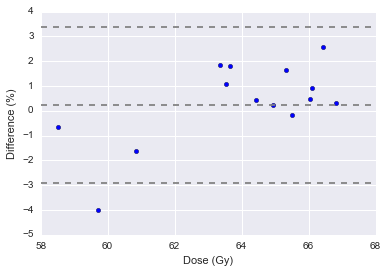

In [86]:
BAstructure = 'PTV CHEST'
BAmetric = 'D50%'
bland_altman_plot(query_data('Dm', BAstructure, BAmetric), query_data('AAA', BAstructure, BAmetric))
plt.show()

7.55692945586e-10
7.55692945586e-10


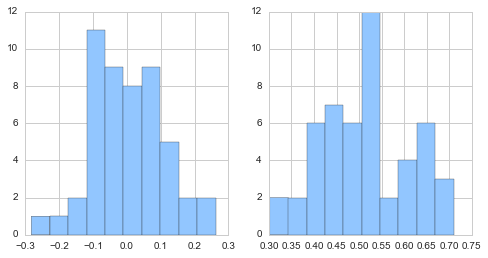

In [2]:
#Test of wilcoxon. See how size of distribution and difference in mean affect result p 

dist_diff = 0.5
samples = 50

mu, sigma = 0, 0.1 
s = np.random.normal(mu, sigma, samples)

mu2, sigma = 0+dist_diff, 0.1 
s2 = np.random.normal(mu2, sigma, samples)

fig = plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.hist(s)

plt.subplot(1, 2, 2)
plt.hist(s2)

z_stat, p_val = stats.wilcoxon(s, s2)   # if only 1 value passed
print(p_val)

z_stat, p_val = stats.wilcoxon(s-s2)   # if only 1 value passed
print(p_val)